In [1]:
import numpy as np
random_state=42
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [3]:
X,y=make_moons(n_samples=10**4,noise=0.15,random_state=42)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
    plt.axis(axes)

In [7]:
axes=[-1.5,2.5,-1,1.5]

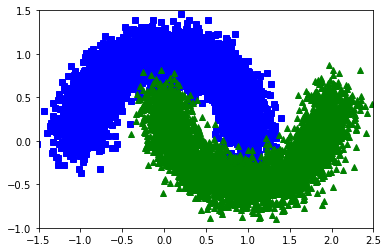

In [8]:
plot_dataset(X_train,y_train,axes)

In [9]:
def plot_model_predictions(model,axes,title=""):
    x0s = np.linspace(axes[0], axes[1], 10000)
    x1s = np.linspace(axes[2], axes[3], 10000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    #y_pred = model.predict(X).reshape(x0.shape)
    y_decision = model.predict(X).reshape(x0.shape)
    #plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    #plt.title("${}$".format(title))

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

In [12]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 755 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    3.3s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [13]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=18, random_state=42)

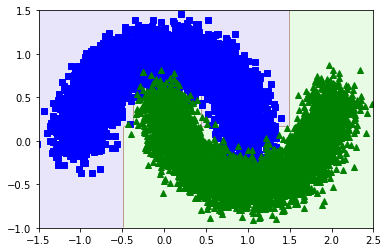

In [14]:
plot_dataset(X,y,axes)
plot_model_predictions(grid_search_cv.best_estimator_,axes)

Validation

In [15]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.9925

Cross-validation

In [16]:
help(grid_search_cv)

Help on GridSearchCV in module sklearn.model_selection._search object:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either 